In [1]:
import qcodes as qc
import numpy as np
from time import sleep

import sweep 
from barreralabdrivers.utils.param_utils import paramp
from cappy.config import testconfig, datapath

In [2]:
qc.Instrument.close_all()   # in case of existing connections

container = qc.Station(config_file=str(testconfig))

dac = container.load_instrument("acdac")
li = container.load_instrument("lockin")
keithley = container.load_instrument("keithley")
yoko = container.load_instrument("yoko")

Connected to: BARRERA ACDAC02 (serial:AD9106, firmware:2.00) in 3.08s
Connected to: Stanford_Research_Systems SR865A (serial:005296, firmware:V1.51) in 0.10s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04608216, firmware:1.7.12b) in 0.01s
Connected to: YOKOGAWA 765611 (serial:90ZC43353, firmware:1.10) in 0.02s


In [3]:
# parameter definitions 
vg = yoko.channel2.voltage
vg.label = "vg" 

vds = keithley.amplitude
vds.label="vds"

dep_params = [vds, li.R, li.P]

In [4]:
# Setup database
sweep.set_basedir(datapath)
s = sweep.Station()
s.reset() 

s.fp(vg)
for dep_parm in dep_params:
    s.fp(dep_parm)

s.add_comment("testing labelling")

# Run Experiment

In [5]:
START = 0 
STOP = -0.7
SAMPLES = 100
INT_TIME = 0.05

def setup():
    dac.frequency(10000)

    dac.ch4.voltage(400)
    dac.ch3.voltage(300)
    dac.display_mode("REMOTE")

    dac.ch1.voltage(100)
    dac.ch2.voltage(0)

    vg.instrument.output(1)

def teardown():
    paramp(vg)
    vg.instrument.output(0)

In [6]:
# run measurement
for dep_param in dep_params:
    s.plot(vg, dep_param)

2024-11-22 01:31:57,308 [INFO] Starting sweep with ID 23
2024-11-22 01:31:57,308 [INFO] Minimum duration 0h 0m 5s


  0%|          | 0/100 [00:00<?, ?it/s]

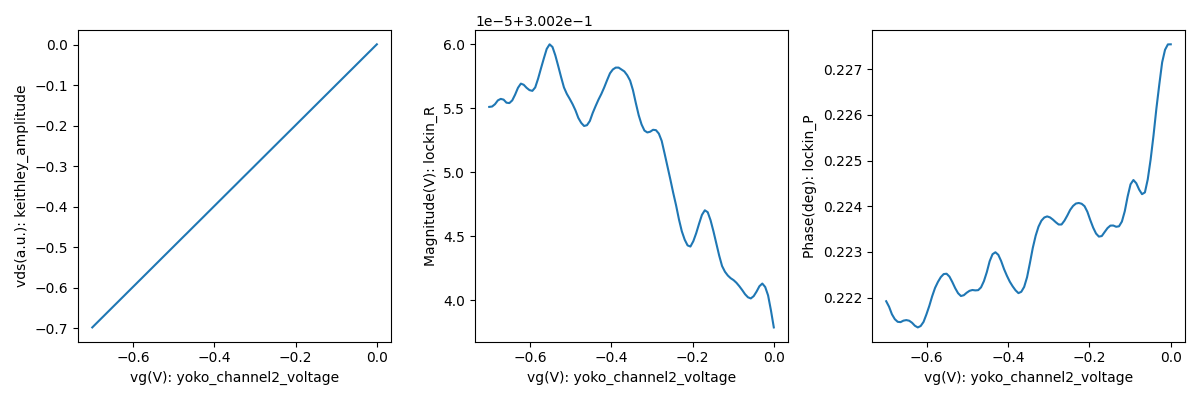

2024-11-22 01:32:08,332 [INFO] Completed in 0h 0m 10s
2024-11-22 01:32:08,332 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data\23\data.tsv.gz


In [7]:
setup()
sleep(2)
res = s.sweep(vg, np.linspace(START, STOP, SAMPLES), delay=INT_TIME)
teardown()

In [8]:
print(res.metadata['columns'])
print(np.loadtxt(res.datapath))

['time', 'vg(V): yoko_channel2_voltage', 'vg(V): yoko_channel2_voltage', 'vds(a.u.): keithley_amplitude', 'Magnitude(V): lockin_R', 'Phase(deg): lockin_P']
[[ 1.73225712e+09  0.00000000e+00  0.00000000e+00  1.52618300e-03
   3.00237864e-01  2.27546036e-01]
 [ 1.73225712e+09 -7.07070707e-03 -7.10000000e-03 -5.53200800e-03
   3.00239205e-01  2.27544323e-01]
 [ 1.73225712e+09 -1.41414141e-02 -1.41000000e-02 -1.26047300e-02
   3.00240368e-01  2.27426514e-01]
 [ 1.73225712e+09 -2.12121212e-02 -2.12000000e-02 -1.96285800e-02
   3.00241023e-01  2.27151588e-01]
 [ 1.73225712e+09 -2.82828283e-02 -2.83000000e-02 -2.67731200e-02
   3.00241292e-01  2.26661518e-01]
 [ 1.73225712e+09 -3.53535354e-02 -3.54000000e-02 -3.38228200e-02
   3.00241083e-01  2.26137310e-01]
 [ 1.73225712e+09 -4.24242424e-02 -4.24000000e-02 -4.08811400e-02
   3.00240666e-01  2.25555047e-01]
 [ 1.73225712e+09 -4.94949495e-02 -4.95000000e-02 -4.79522800e-02
   3.00240308e-01  2.25027397e-01]
 [ 1.73225712e+09 -5.65656566e-02 -5